In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from particle_creation import par_create_2d
from mass_asign import cic_density_2d
from acceleration import cic_acc_2d
from gravty import grav_from_den_2d

In [2]:
ng = 16
num_par = 1
pars_pos = np.array([[0,0]]).astype(np.float32)
# pars_pos = (np.random.rand(num_par, 2)*ng).astype(np.float32)
pars_vel = np.array([[1,1]]).astype(np.float32)
# pars_vel = np.zeros_like(pars_pos).astype(np.float32)
# pars_mass = np.random.rand(num_par).astype(np.float32)*10
# pars_mass = np.array([5., 5.,5,5]).astype(np.float32)
pars_mass = np.ones_like(pars_pos[:,0]).astype(np.float32)
pars_df = pd.DataFrame({'pos_x': pars_pos[:,0], 'pos_y': pars_pos[:,1],
                        'vel_x': pars_vel[:,0], 'vel_y': pars_vel[:,1],
                        'mass': pars_mass})
par_list = par_create_2d(pars_df)
pars_df

,pos_x,pos_y,vel_x,vel_y,mass
0,0.0,0.0,1.0,1.0,1.0


In [3]:
par_list[0].vel

array([1., 1.], dtype=float32)

[1. 1.] [0. 0.]
[1. 1.] [2.17184215 2.17184215]
[3.171842 3.171842] [2.17184215 2.17184215]
[3.171842 3.171842] [ 2.77555756e-17 -1.66533454e-16]
[3.171842 3.171842] [ 2.77555756e-17 -1.66533454e-16]
[3.171842 3.171842] [8.32667268e-17 8.32667268e-17]
[3.171842 3.171842] [8.32667268e-17 8.32667268e-17]
[3.171842 3.171842] [-1.11022302e-16 -1.38777878e-16]
[3.171842 3.171842] [-1.11022302e-16 -1.38777878e-16]
[3.171842 3.171842] [-8.32667268e-17 -4.16333634e-17]


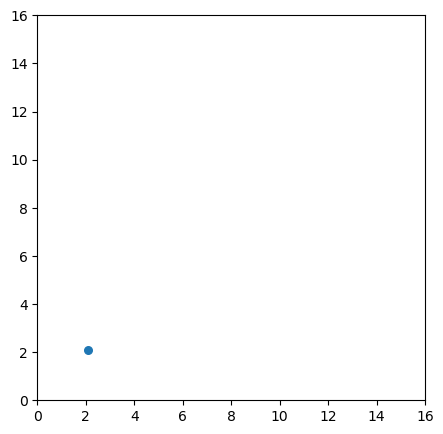

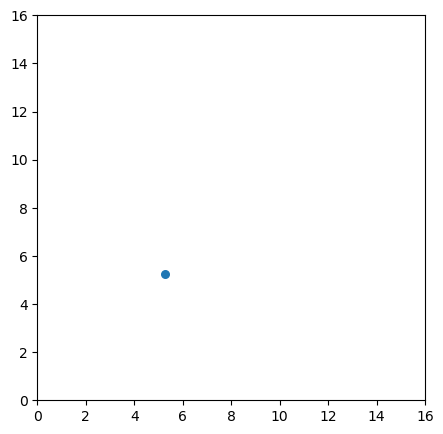

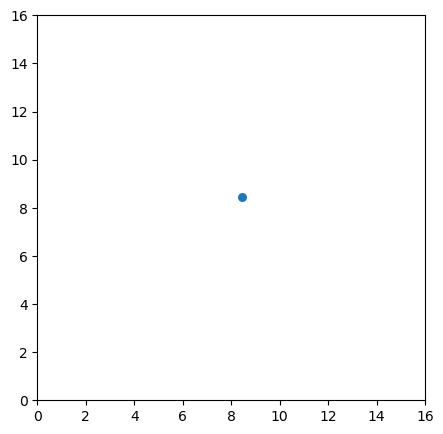

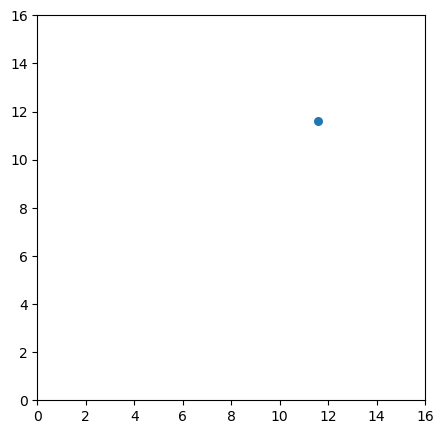

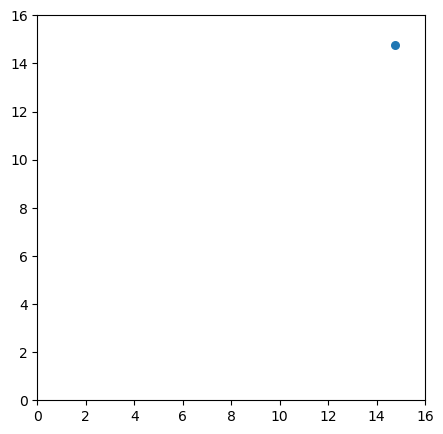

In [4]:
dt = 1
for step in range(5):
     
    for par in par_list:
        print(par.vel,par.acc)
        # Fitrst step:
        par.pos += par.vel * 0.5 * dt
        # Boundary condition
        par.pos = np.where(par.pos > ng, par.pos - ng, par.pos)
        par.pos = np.where(par.pos < 0, par.pos + ng, par.pos)
        
    dens = cic_density_2d(pars=par_list, ng=ng, h=1) ## Update density field
    gravity = grav_from_den_2d(dens)    ## Update gravity field
    cic_acc_2d(pars=par_list, ng=ng, gravity=gravity, h=1)  ## Update acceleration
    print(par.vel,par.acc)
    # Second step:
    for par in par_list:
        par.vel += par.acc * dt
        par.pos += par.vel * 0.5 * dt
        # Boundary condition
        par.pos = np.where(par.pos > ng, par.pos - ng, par.pos)
        par.pos = np.where(par.pos < 0, par.pos + ng, par.pos)
    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.set_ylim(0, ng)
    for par in par_list:
    # for par in [par_list[0]]:
        ax.scatter(par.pos[0], par.pos[1], s=30)
        ax.set_xlim(0, ng)
        ax.set_ylim(0, ng)
    

In [14]:
par.acc

array([-8.32667268e-17, -4.16333634e-17])

In [15]:
par.vel

array([3.171842, 3.171842], dtype=float32)